In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_curve, precision_recall_fscore_support
from matplotlib import pyplot as plt
import scikitplot as skplt
from joblib import dump, load

In [4]:
pip install scikit-plot

In [15]:
datasetTrain  = pd.read_csv('/content/drive/My Drive/GrupoEstudiantesAgo-Dic2020/IDS/DataSets/CICDoS2017/Pre-processed/dataTrain.csv')
datasetTest   = pd.read_csv('/content/drive/My Drive/GrupoEstudiantesAgo-Dic2020/IDS/DataSets/CICDoS2017/Pre-processed/dataTest.csv')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
datasetTrain.drop(columns=['Unnamed: 0'])

datasetTest.drop(columns=['Unnamed: 0'])

,Src.IP,Src.Port,Dst.IP,Dst.Port,Protocol,Flow.Duration,Tot.Fwd.Pkts,Tot.Bwd.Pkts,TotLen.Fwd.Pkts,TotLen.Bwd.Pkts,Fwd.Pkt.Len.Max,Fwd.Pkt.Len.Min,Fwd.Pkt.Len.Std,Bwd.Pkt.Len.Max,Bwd.Pkt.Len.Min,Bwd.Pkt.Len.Std,Flow.Byts.s,Flow.Pkts.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Min,Bwd.IAT.Tot,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Fwd.Pkts.s,Bwd.Pkts.s,Pkt.Len.Min,Pkt.Len.Max,Pkt.Len.Mean,Pkt.Len.Std,Pkt.Len.Var,FIN.Flag.Cnt,SYN.Flag.Cnt,RST.Flag.Cnt,PSH.Flag.Cnt,Down.Up.Ratio,Bwd.Pkts.b.Avg,Bwd.Blk.Rate.Avg,Subflow.Fwd.Pkts,Subflow.Fwd.Byts,Subflow.Bwd.Byts,Init.Fwd.Win.Byts,Init.Bwd.Win.Byts,Fwd.Seg.Size.Min,Idle.Mean,Idle.Std,Idle.Min,Label
0,192.168.1.104,16759,216.109.86.150,80,6,49739.0,2,1,92,46.0,46,46,0.000000,46,46,0.000000,2774.482800,60.314843,24869.500000,34851.171920,49513.0,226.0,49739.00000,0.000000e+00,49739.0,0.0,0.000000,0.000000,0.0,0.0,0,40.209896,20.104948,46,46,46.000000,0.000000,0.000000,2,0,0,0,0,0,0.0,0,30,15,15955,8190,20,0.000000e+00,0.000000e+00,0.000000e+00,0
1,192.168.2.110,2080,66.235.126.96,80,6,394615.0,25,41,1248,56364.0,142,46,19.187496,1500,46,396.801148,145995.463900,167.251625,6071.000000,10084.359500,42989.0,123.0,14859.87500,1.476394e+04,123.0,358271.0,8956.775000,11197.723820,44225.0,807.0,0,63.352888,103.898737,46,1500,860.597015,720.215036,518709.698800,2,2,0,2,1,66,145995.0,0,18,854,64240,5840,20,1.280000e+15,9.034915e+04,1.280000e+15,0
2,192.168.2.110,2084,66.235.126.81,80,6,288722.0,13,19,685,23927.0,131,46,23.535026,1500,46,541.921484,85244.629780,110.833258,9313.612903,25649.170480,138878.0,45.0,20976.58333,4.234176e+04,45.0,250069.0,13892.722220,32316.136340,139414.0,3529.0,0,45.026011,65.807247,46,1500,747.272727,729.622517,532349.017000,2,2,0,2,1,32,85244.0,0,21,747,64240,5840,20,1.280000e+15,6.269546e+04,1.280000e+15,0
3,192.168.2.110,2085,66.235.126.81,80,6,345989.0,13,19,661,23927.0,107,46,16.881184,1500,46,541.921484,71065.843130,92.488490,11160.935480,34704.787700,191380.0,12.0,25683.25000,5.446498e+04,12.0,154609.0,8589.388889,11663.651060,42180.0,3559.0,0,37.573449,54.915041,46,1500,746.545455,730.267677,533290.880700,2,2,0,2,1,32,71065.0,0,20,747,64240,5840,20,1.280000e+15,5.762405e+04,1.280000e+15,0
4,192.168.1.104,16769,67.228.37.8,80,6,208337.0,5,5,294,1580.0,108,46,27.517267,1394,46,602.620942,8995.041687,47.999155,23148.555560,32380.326310,67103.0,6.0,35398.00000,4.106636e+04,23.0,143654.0,35913.500000,36877.806090,67986.0,6.0,0,23.999578,23.999578,46,1394,174.727273,404.806396,163868.218200,2,2,0,2,1,10,8995.0,0,29,158,16384,65534,20,1.280000e+15,5.368100e+04,1.280000e+15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55868,192.168.1.105,19245,192.168.5.122,22,6,244004.0,8,22,900,4150.0,280,46,82.757822,824,46,291.815425,20696.382030,122.948804,8413.931034,18888.282640,82312.0,25.0,29443.28571,4.283740e+04,769.0,243609.0,11600.428570,24435.398940,82851.0,25.0,0,32.786348,90.162456,46,824,164.451613,250.615488,62808.122580,0,3,0,14,2,30,20696.0,0,30,138,16384,7504,20,1.280000e+15,9.074049e+04,1.280000e+15,0
55869,192.168.3.114,2235,192.168.5.122,22,6,1423.0,3,4,140,188.0,48,46,1.154701,48,46,1.154701,230498.945900,4919.184821,237.166667,89.360879,349.0,147.0,711.50000,1.626346e+01,700.0,879.0,293.000000,250.285837,582.0,147.0,0,2108.222066,2810.962755,46,48,47.000000,1.069045,1.142857,2,3,0,0,1,7,230498.0,0,20,26,16384,5840,20,1.280000e+15,4.153100e+02,1.280000e+15,0
55870,192.168.3.115,3379,192.168.5.122,22,6,261724.0,8,22,900,4150.0,280,46,82.757822,824,46,291.815425,19295.135330,114.624566,9024.965517,21195.868210,97398.0,22.0,31874.00000,4.700581e+04,875.0,261377.0,12446.523810,27176.708860,97882.0,22.0,0,30.566551,84.058015,46,824,164.451613,250.615488,62808.122580,0,3,0,14,2,30,19295.0,0,30,138,16384,7504,20,1.280000

In [17]:
# Separate data> Labels
Y_train = datasetTrain.loc[:,['Label']].values
Y_test = datasetTest.loc[:,['Label']].values

In [18]:
# Separate data> values
X_train = datasetTrain.loc[:, ['Flow.Duration',	'Tot.Fwd.Pkts',	'Tot.Bwd.Pkts',  
                         'TotLen.Fwd.Pkts',	'TotLen.Bwd.Pkts', 'Fwd.Pkt.Len.Max',	
                         'Fwd.Pkt.Len.Min',	'Fwd.Pkt.Len.Std', 'Bwd.Pkt.Len.Max',
                         'Bwd.Pkt.Len.Min',	'Bwd.Pkt.Len.Std', 'Flow.Byts.s',	
                         'Flow.Pkts.s',	'Flow.IAT.Mean',	'Flow.IAT.Std',	
                         'Flow.IAT.Max',	'Flow.IAT.Min',	'Fwd.IAT.Mean',	
                         'Fwd.IAT.Std',	'Fwd.IAT.Min',	'Bwd.IAT.Tot',	
                         'Bwd.IAT.Mean',	'Bwd.IAT.Std',	'Bwd.IAT.Max',	
                         'Bwd.IAT.Min',	'Fwd.PSH.Flags',	'Fwd.Pkts.s',	
                         'Bwd.Pkts.s',	'Pkt.Len.Min',	'Pkt.Len.Max',
                         'Pkt.Len.Mean',	'Pkt.Len.Std',	'Pkt.Len.Var',
                         'FIN.Flag.Cnt',	'SYN.Flag.Cnt',	'RST.Flag.Cnt',
                         'PSH.Flag.Cnt',	'Down.Up.Ratio', 'Bwd.Pkts.b.Avg',	
                         'Bwd.Blk.Rate.Avg',	'Subflow.Fwd.Pkts',	'Subflow.Fwd.Byts',
                         'Subflow.Bwd.Byts',	'Init.Fwd.Win.Byts',	'Init.Bwd.Win.Byts',
                         'Fwd.Seg.Size.Min', 'Idle.Mean', 'Idle.Std',	'Idle.Min']].values
#'Src.IP',	'Src.Port',	'Dst.IP',	'Dst.Port', 'Protocol',	                         
X_test = datasetTest.loc[:, ['Flow.Duration',	'Tot.Fwd.Pkts',	'Tot.Bwd.Pkts',
                         'TotLen.Fwd.Pkts',	'TotLen.Bwd.Pkts', 'Fwd.Pkt.Len.Max',	
                         'Fwd.Pkt.Len.Min',	'Fwd.Pkt.Len.Std', 'Bwd.Pkt.Len.Max',
                         'Bwd.Pkt.Len.Min',	'Bwd.Pkt.Len.Std', 'Flow.Byts.s',	
                         'Flow.Pkts.s',	'Flow.IAT.Mean',	'Flow.IAT.Std',	
                         'Flow.IAT.Max',	'Flow.IAT.Min',	'Fwd.IAT.Mean',	
                         'Fwd.IAT.Std',	'Fwd.IAT.Min',	'Bwd.IAT.Tot',	
                         'Bwd.IAT.Mean',	'Bwd.IAT.Std',	'Bwd.IAT.Max',	
                         'Bwd.IAT.Min',	'Fwd.PSH.Flags',	'Fwd.Pkts.s',	
                         'Bwd.Pkts.s',	'Pkt.Len.Min',	'Pkt.Len.Max',
                         'Pkt.Len.Mean',	'Pkt.Len.Std',	'Pkt.Len.Var',
                         'FIN.Flag.Cnt',	'SYN.Flag.Cnt',	'RST.Flag.Cnt',
                         'PSH.Flag.Cnt',	'Down.Up.Ratio', 'Bwd.Pkts.b.Avg',	
                         'Bwd.Blk.Rate.Avg',	'Subflow.Fwd.Pkts',	'Subflow.Fwd.Byts',
                         'Subflow.Bwd.Byts',	'Init.Fwd.Win.Byts',	'Init.Bwd.Win.Byts',
                         'Fwd.Seg.Size.Min', 'Idle.Mean', 'Idle.Std',	'Idle.Min']].values

In [19]:
X_test.shape

(55873, 49)

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
joblib.dump(sc, "scaler.joblib") 

['scaler.joblib']

In [21]:
#PCA for 85% 
pca = PCA(0.85)
pca.fit(X_train)
pca.n_components_

16

In [ ]:
joblib.dump(pca, "pca85.joblib") 

['pca85.joblib']

In [22]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
Y_train = np.ravel(Y_train,order='C')
Y_test = np.ravel(Y_test,order='C')


In [ ]:

# Train model
regressor.fit(X_train, Y_train)
dump(regressor, 'gdrive/My Drive/Datasets/2017/RF2017/RF2017.joblib')
# Apply trained model to test


In [ ]:
joblib.dump(regressor, "svm2017.joblib") 

load model

In [6]:
import joblib
regressor = joblib.load('/content/drive/MyDrive/GrupoEstudiantesAgo-Dic2020/IDS/Aplicaciones/Modelling/Best Model Objects/CICDoS2017/rf/RF2017/RF2017.joblib')

In [12]:
print(regressor)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features=15,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=750,
                       n_jobs=-1, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)


test on the training dataset

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics
y_pred = regressor.predict(X_train)
yyhat = y_pred
accuracy = metrics.accuracy_score(Y_train, yyhat)
print(accuracy)
# precision recall and fscore
precision_recall_fscore_support(Y_train, yyhat, average='weighted')

0.9984322050403147


(0.9984628710986017, 0.9984322050403147, 0.998437580328681, None)

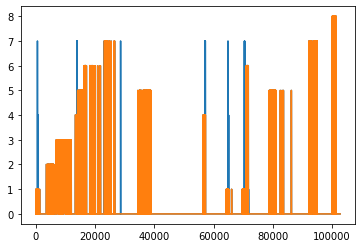

In [ ]:
plt.plot(y_pred)
plt.plot(Y_train)


***************************************************************
EVALUATE MODEL ON TESTING DATA
***************************************************************
Assessment: 2 classes
Accuracy 0.9618241368818571
Precision 0.9620777113401173
F1-SCORE 0.9610775050834816
RECALL (TPR) 0.9618241368818571
FALSE POS. RATE (FPR) 0.00854660607915617
***************************************************************
Assessment: n classes
Accuracy 0.9099207130456571
Precision 0.9303555010788868
F1-SCORE 0.9067500248169972
RECALL (TPR) 0.9099207130456571


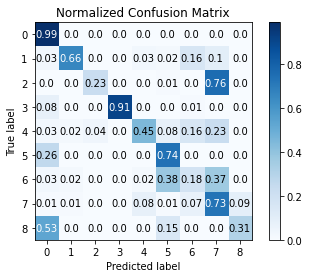

In [ ]:
from sklearn.metrics import accuracy_score, recall_score,f1_score,precision_score,roc_auc_score
print("***************************************************************")
print("EVALUATE MODEL ON TESTING DATA")
yhat = regressor.predict(X_test)
yyhat = yhat
print("***************************************************************")    
print("Assessment: 2 classes") 

y_test2c = np.array(Y_test)
y_test2c [y_test2c>=1] = 1;
y_hat2c = np.array(yyhat)
y_hat2c [y_hat2c>=1] = 1;
print("Accuracy", accuracy_score(y_test2c, y_hat2c))
print("Precision", precision_score(y_test2c, y_hat2c, average='weighted'))
print("F1-SCORE", f1_score(y_test2c, y_hat2c, average='weighted'))
print("RECALL (TPR)", recall_score(y_test2c, y_hat2c, average='weighted'))
TN, TP, FP, FN = 0,0,0,0 
for k in range (0,len(yhat)):
    ylabel     = Y_test[k];
    ypredicted = yhat[k];
    if ypredicted == 0 and ylabel == 0:
        TN = TN + 1
    elif ypredicted > 0 and ylabel > 0:
        TP = TP + 1
    elif ypredicted > 0 and ylabel == 0:
        FP = FP + 1
    elif ypredicted == 0 and ylabel > 0:
        FN = FN + 1
    else:
        print('any')
print("FALSE POS. RATE (FPR)", (FP)/(FP+TN))


print("***************************************************************") 
print("Assessment: n classes") 
print("Accuracy", accuracy_score(Y_test, yhat))
print("Precision", precision_score(Y_test, yhat, average='weighted'))
print("F1-SCORE", f1_score(Y_test, yhat, average='weighted'))
print("RECALL (TPR)", recall_score(Y_test, yhat, average='weighted'))

skplt.metrics.plot_confusion_matrix(Y_test,yhat,normalize="True")

# Time complexity Analysis



In [ ]:
import timeit

def prediction():
  yhat = regressor.predict(X_test[0:10000]);

# load model and testing data

execution_time = timeit.repeat(prediction, number=1, repeat=100)
print('Average Flow/s: ', 1/((min(execution_time))/10000))



Average Flow/s:  14215.954505180423


In [ ]:
y = X_test[0:10000]
y.shape

(10000, 16)

In [38]:
nnodes = []
for k in range (0,regressor.n_estimators):
  nn = regressor.estimators_[k].tree_.node_count
  nnodes.append(nn)

print(nnodes)
print(sum(nnodes))

[931, 903, 909, 927, 975, 907, 939, 911, 913, 969, 933, 923, 897, 935, 899, 951, 923, 921, 961, 929, 931, 909, 955, 927, 945, 919, 945, 907, 961, 953, 917, 935, 925, 925, 943, 953, 911, 933, 927, 915, 929, 951, 935, 931, 921, 965, 901, 933, 925, 911, 929, 963, 921, 929, 965, 963, 923, 933, 907, 945, 967, 905, 875, 913, 913, 897, 941, 927, 927, 933, 927, 907, 937, 919, 919, 927, 957, 937, 941, 947, 919, 933, 915, 937, 939, 913, 939, 915, 921, 915, 901, 953, 919, 921, 901, 971, 933, 943, 967, 941, 921, 921, 843, 935, 935, 969, 923, 913, 937, 921, 929, 931, 941, 939, 925, 911, 917, 925, 923, 937, 961, 957, 917, 925, 919, 941, 979, 927, 931, 955, 925, 931, 921, 945, 927, 935, 935, 957, 957, 947, 933, 925, 971, 955, 925, 909, 933, 917, 909, 941, 931, 923, 913, 903, 923, 935, 933, 953, 927, 929, 963, 909, 897, 931, 935, 925, 947, 963, 897, 933, 967, 957, 925, 917, 947, 943, 935, 945, 911, 907, 943, 929, 955, 963, 931, 971, 913, 959, 941, 937, 933, 957, 941, 933, 951, 989, 945, 921, 915, 919,

In [39]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

In [41]:
!cat /proc/meminfo | egrep “^MemTotal”

plot trees

In [27]:

estimator = regressor.estimators_[5]
from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = ['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10','p11','p12','p13','p14','p15','p16'],
                class_names = ['c1','c2','c3','c4','c5','c6','c7','c8','c9'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

Output hidden; open in https://colab.research.google.com to view.